In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
df=pd.read_csv('pilfelx13forecasting.csv')

In [50]:
df.head()

,Month,Sales
0,2018-04,1037100.0
1,2018-05,929925.0
2,2018-06,1084775.0
3,2018-07,1088375.0
4,2018-08,1065000.0


In [51]:
df.tail()

,Month,Sales
46,2022-02,1562300.0
47,2022-03,1668000.0
48,2022-04,1888350.0
49,2022-05,1996850.0
50,2022-06,1846625.0


In [52]:
df.describe()

,Sales
count,5.100000e+01
mean,1.140245e+06
std,4.161869e+05
min,2.435000e+04
25%,8.655150e+05
50%,1.082450e+06
75%,1.424550e+06
max,1.996850e+06


In [53]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [54]:
df.set_index('Month',inplace=True)

In [55]:
df.head()

,Sales
Month,
2018-04-01,1037100.0
2018-05-01,929925.0
2018-06-01,1084775.0
2018-07-01,1088375.0
2018-08-01,1065000.0


<AxesSubplot:xlabel='Month'>

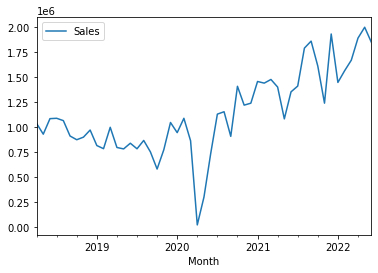

In [56]:
df.plot()

In [57]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [58]:
test_result=adfuller(df['Sales'])

In [59]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")    

In [60]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.9348915035469385
p-value : 0.3158291960691816
#Lags Used : 0
Number of Observations Used : 50
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Differencing

In [61]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [62]:
df['Sales'].shift(1)

Month
2018-04-01          NaN
2018-05-01    1037100.0
2018-06-01     929925.0
2018-07-01    1084775.0
2018-08-01    1088375.0
2018-09-01    1065000.0
2018-10-01     911440.0
2018-11-01     874350.0
2018-12-01     900100.0
2019-01-01     971150.0
2019-02-01     816300.0
2019-03-01     785050.0
2019-04-01     998500.0
2019-05-01     796950.0
2019-06-01     782800.0
2019-07-01     839500.0
2019-08-01     784000.0
2019-09-01     867350.0
2019-10-01     753000.0
2019-11-01     581850.0
2019-12-01     774050.0
2020-01-01    1046400.0
2020-02-01     945150.0
2020-03-01    1088270.0
2020-04-01     863680.0
2020-05-01      24350.0
2020-06-01     302640.0
2020-07-01     734400.0
2020-08-01    1129800.0
2020-09-01    1153700.0
2020-10-01     908125.0
2020-11-01    1407615.0
2020-12-01    1219575.0
2021-01-01    1239025.0
2021-02-01    1455600.0
2021-03-01    1439275.0
2021-04-01    1475800.0
2021-05-01    1399950.0
2021-06-01    1082450.0
2021-07-01    1352150.0
2021-08-01    1409825.0
2021-09-01

In [63]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(3)

In [71]:
df.head()

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
2018-04-01,1037100.0,NaN,NaN
2018-05-01,929925.0,-107175.0,NaN
2018-06-01,1084775.0,154850.0,NaN
2018-07-01,1088375.0,3600.0,51275.0
2018-08-01,1065000.0,-23375.0,135075.0


In [72]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.106925085659158
p-value : 9.535304271398995e-08
#Lags Used : 2
Number of Observations Used : 45
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

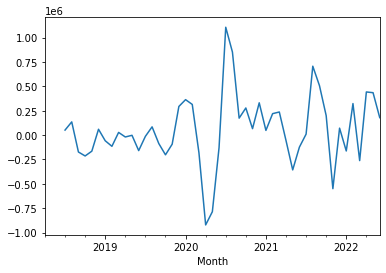

In [73]:
df['Seasonal First Difference'].plot()

In [69]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

NameError: name 'sm' is not defined

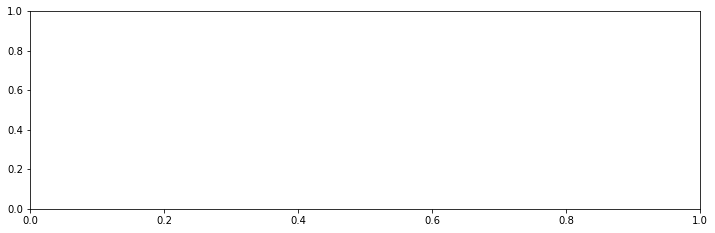

In [70]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)